In [ ]:
# !pip install torchinfo

## AlexNet 구현

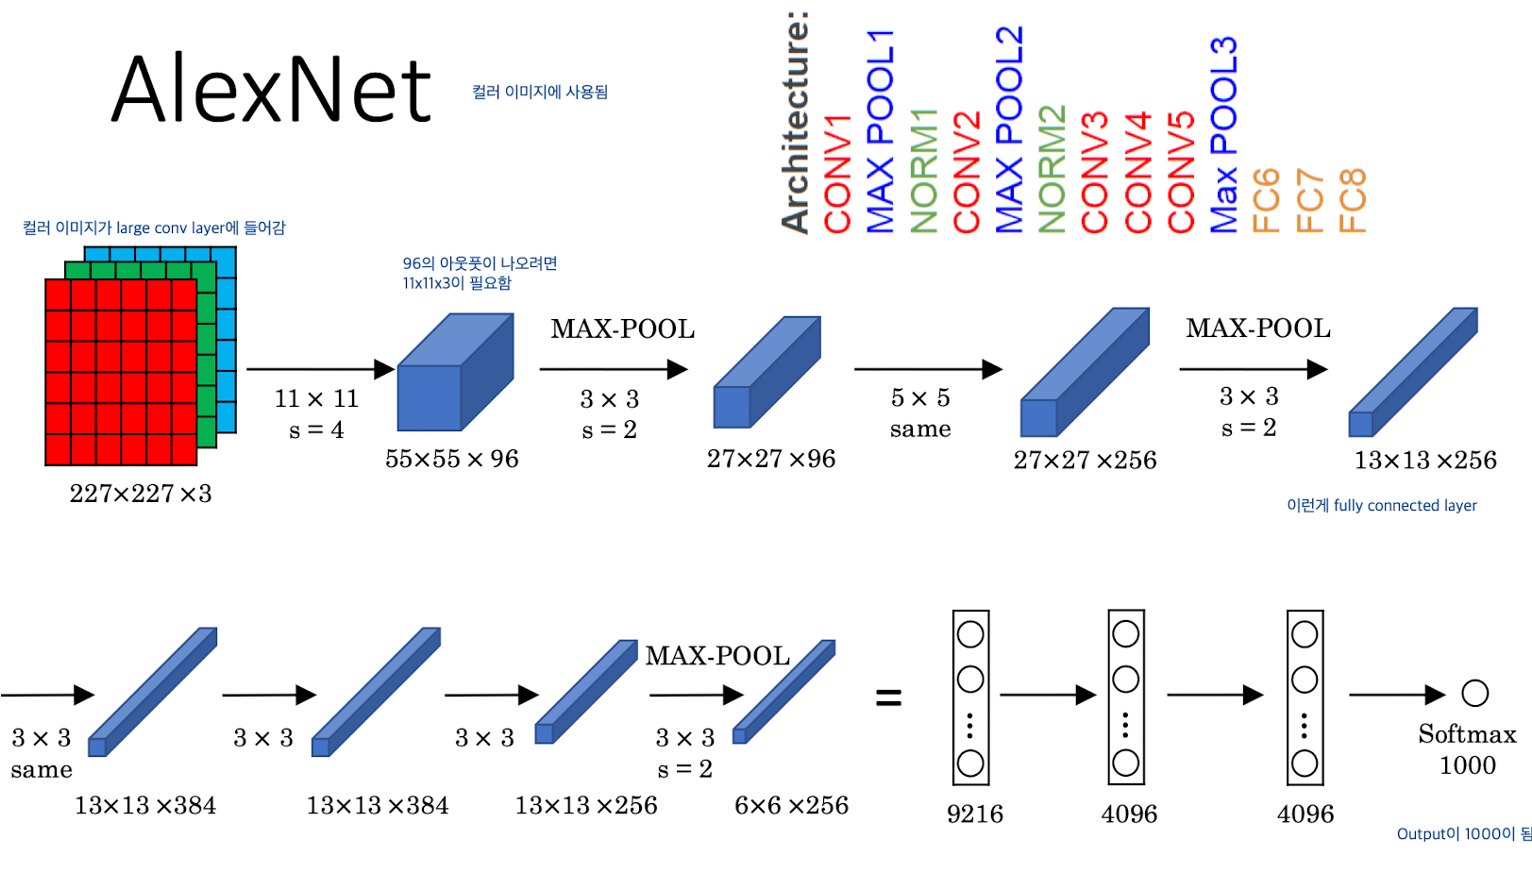

당시 GTX 580 3 GB 두 장으로만 훈련 가능해 모델 파라미터를 반씩 나눠 실행했다. 현대 GPU에는 10 GB 이상 메모리가 흔해 통합 구조가 더 단순·빠르다. PyTorch torchvision.models.alexnet은 저자가 단일 GPU용으로 다시 공개한 Caffe 모델을 그대로 옮긴 버전

In [ ]:
import torch
import torch.nn as nn

class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            # 첫 번째 Convolution: 입력 채널 3, 출력 채널 64, 커널 크기 11, stride 4, padding 2
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),

            # 두 번째 Convolution: 입력 64, 출력 192, 커널 크기 5, padding 2
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),

            # 세 번째 Convolution: 입력 192, 출력 384, 커널 크기 3, padding 1
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            # 네 번째 Convolution: 입력 384, 출력 256, 커널 크기 3, padding 1
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            # 다섯 번째 Convolution: 입력 256, 출력 256, 커널 크기 3, padding 1
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        # AdaptiveAvgPool를 사용하여 임의의 입력 크기에 대해 고정된 출력 크기 (6, 6)를 만듭니다.
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        # 첫 번째 차원을 제외하고 flatten합니다.
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# 모델 인스턴스 생성 및 테스트 예시
if __name__ == '__main__':
    model = AlexNet(num_classes=1000)
    print(model)

    # 임의의 입력 (배치 크기 1, 채널 3, 224x224 이미지)
    x = torch.randn(1, 3, 224, 224)
    output = model(x)
    print("출력 크기:", output.shape)  # 예상 출력: torch.Size([1, 1000])


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

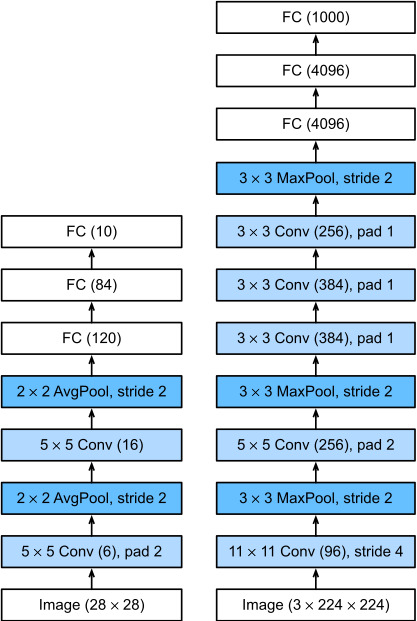

In [ ]:
from torchinfo import summary
summary(model, input_size = (1, 3, 224, 224 ))

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 1000]                 --
├─Sequential: 1-1                        [1, 256, 6, 6]            --
│    └─Conv2d: 2-1                       [1, 64, 55, 55]           23,296
│    └─ReLU: 2-2                         [1, 64, 55, 55]           --
│    └─MaxPool2d: 2-3                    [1, 64, 27, 27]           --
│    └─Conv2d: 2-4                       [1, 192, 27, 27]          307,392
│    └─ReLU: 2-5                         [1, 192, 27, 27]          --
│    └─MaxPool2d: 2-6                    [1, 192, 13, 13]          --
│    └─Conv2d: 2-7                       [1, 384, 13, 13]          663,936
│    └─ReLU: 2-8                         [1, 384, 13, 13]          --
│    └─Conv2d: 2-9                       [1, 256, 13, 13]          884,992
│    └─ReLU: 2-10                        [1, 256, 13, 13]          --
│    └─Conv2d: 2-11                      [1, 256, 13, 13]         

## 사전 훈련된 모델 활용

파이토치에서 제공하는 알렉스넷 모델 : https://pytorch.org/vision/main/models/generated/torchvision.models.alexnet.html

https://docs.pytorch.org/vision/main/_modules/torchvision/models/alexnet.html

  

위의 모델 빌더는 **weights(가중치) 매개변수**로 다음 값을 허용합니다.  
**`AlexNet_Weights.DEFAULT`**는 **`AlexNet_Weights.IMAGENET1K_V1`**과 동일합니다.  
또한 문자열을 사용할 수도 있으며, 예를 들어 **`weights='DEFAULT'`** 또는 **`weights='IMAGENET1K_V1'`**처럼 지정할 수 있습니다.  

---

### **AlexNet_Weights.IMAGENET1K_V1:**
이 가중치는 논문의 결과를 간단한 학습 방법을 사용하여 거의 동일하게 재현한 것입니다.  
또한 **`AlexNet_Weights.DEFAULT`**로도 제공됩니다.  

#### **모델 성능 (ImageNet-1K 기준)**
- **Top-1 정확도 (acc@1):** 56.522%  
- **Top-5 정확도 (acc@5):** 79.066%  
- **총 파라미터 수:** 61,100,840  
- **최소 입력 이미지 크기:** 높이 63px, 너비 63px  
- **분류 가능한 카테고리:**  
  - 예시: **tench(숭어), goldfish(금붕어), great white shark(백상아리)** 등 (총 1000개 중 997개 생략)  
- **학습 방법 (recipe):** 링크 제공  
- **연산량 (GFLOPS):** 0.71 GFLOPS (1초당 약 7,100만 개의 부동소수점 연산 수행)  
- **모델 파일 크기:** 233.1MB  

---

### **추론(Inference) 변환**
**`AlexNet_Weights.IMAGENET1K_V1.transforms`**에서 제공하는 변환(transforms)은 다음과 같은 전처리 과정을 수행합니다.  

1. **입력 형식:**  
   - `PIL.Image` 객체  
   - 배치(batch) 형식: `(B, C, H, W)`  
   - 단일(single) 이미지 형식: `(C, H, W)`

2. **이미지 전처리 과정:**  
   - **리사이징(resizing):**  
     - **크기:** `resize_size=[256]`  
     - **보간법(interpolation):** `InterpolationMode.BILINEAR(양선형 보간법)` 사용  
   - **중앙 크롭(central crop):**  
     - **크기:** `crop_size=[224]`  
   - **정규화(normalization):**  
     - 픽셀 값 범위 변환: `[0.0, 1.0]`로 리스케일  
     - 평균(mean) 및 표준 편차(std) 사용하여 정규화  
       - **평균(mean):** `[0.485, 0.456, 0.406]`  
       - **표준 편차(std):** `[0.229, 0.224, 0.225]`  

이러한 전처리는 모델이 학습된 데이터와 동일한 입력 형태를 유지하도록 하기 위해 필요합니다.

In [ ]:
# 모델 구조
from torchvision import models

model = models.alexnet(weights='AlexNet_Weights.IMAGENET1K_V1')
model

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 164MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
summary(model, (1, 3, 224, 224), device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 1000]                 --
├─Sequential: 1-1                        [1, 256, 6, 6]            --
│    └─Conv2d: 2-1                       [1, 64, 55, 55]           23,296
│    └─ReLU: 2-2                         [1, 64, 55, 55]           --
│    └─MaxPool2d: 2-3                    [1, 64, 27, 27]           --
│    └─Conv2d: 2-4                       [1, 192, 27, 27]          307,392
│    └─ReLU: 2-5                         [1, 192, 27, 27]          --
│    └─MaxPool2d: 2-6                    [1, 192, 13, 13]          --
│    └─Conv2d: 2-7                       [1, 384, 13, 13]          663,936
│    └─ReLU: 2-8                         [1, 384, 13, 13]          --
│    └─Conv2d: 2-9                       [1, 256, 13, 13]          884,992
│    └─ReLU: 2-10                        [1, 256, 13, 13]          --
│    └─Conv2d: 2-11                      [1, 256, 13, 13]         

- 토치비전 라이브러리를 활용해 이미지넷으로 사전학습된 알렉스넷 모델을 불러옴.
- 이미지넷은 1000개의 클래스로 구성된 데이터셋이므로, 이 모델은 1000개 클래스에 대한 예측을 수행

In [ ]:
# 클래스 정보 파일 불러오기
# https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

import requests

# URL 설정
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"

# 요청하여 파일 불러오기
response = requests.get(url)

# 텍스트 데이터를 리스트로 변환 (각 줄을 요소로 저장)
imagenet_classes = response.text.strip().split("\n")

# 결과 확인 (앞부분 10개 출력)
print(imagenet_classes)  # ['tench, Tinca tinca', 'goldfish, Carassius auratus', ...]


['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'rock python', 'Indian cobra', 'green mamba', 'sea snake', 'horned viper', 'diamondback', 

In [ ]:
print("클래스 개수 : ", len(imagenet_classes))

클래스 개수 :  1000


### 모델 활용하기

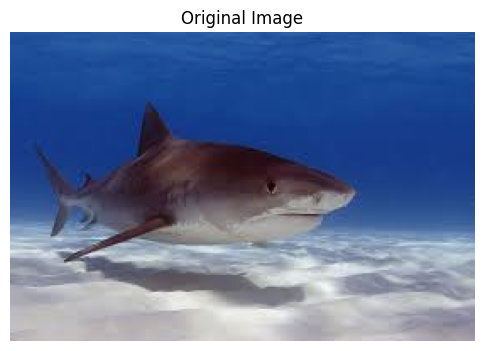

Top 5 예측 결과:
tiger shark: 0.9962
hammerhead: 0.0020
great white shark: 0.0008
dugong: 0.0004
axolotl: 0.0002


In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt


# 1. 이미지 다운로드 및 로드
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPqUIvVs_Q2veVfJXJgmU4HqJDedpaLTb5Vg&s'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('RGB')  # 확실한 RGB 변환

# 이미지 시각화 (원본 이미지)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.title("Original Image")
plt.show()

# 2. 전처리: AlexNet은 ImageNet 기준으로 학습되었으므로, 해당 전처리 과정을 사용합니다.
preprocess = transforms.Compose([
    transforms.Resize(256),               # 짧은 변을 256픽셀로 조정
    transforms.CenterCrop(224),           # 정중앙에서 224x224 크롭
    transforms.ToTensor(),                # 텐서 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet 평균
                         std=[0.229, 0.224, 0.225])   # ImageNet 표준편차
])

img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)  # 배치 차원 추가

# 3. 모델 로드 및 평가 모드 설정
model = models.alexnet(weights='AlexNet_Weights.IMAGENET1K_V1')
model.eval()  # 평가 모드로 전환

# 4. 추론 진행 (with torch.no_grad()로 gradient 계산 방지)
with torch.no_grad():
    output = model(batch_t)

# 5. softmax를 통해 클래스 확률 계산 및 Top5 예측
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top5_prob, top5_catid = torch.topk(probabilities, 5)

print("Top 5 예측 결과:")
for i in range(top5_prob.size(0)):
    print(f"{imagenet_classes[top5_catid[i]]}: {top5_prob[i].item():.4f}")


# 실습

## CIFAR-10 데이터셋을 활용한 AlexNet 모델 학습 및 평가

### 실습 목표
- **AlexNet 모델**을 활용하여 CIFAR-10 데이터셋에 대해 학습 및 평가해보고,
- **세 가지 전략**(From Scratch, Feature Extraction, Fine-tuning)의 성능 차이를 비교해봅니다.
- 학습 과정에서 **loss**와 **accuracy** 변화를 시각화하여 모델의 학습 추세를 분석합니다.

### 실습 단계
1. **환경 설정 및 코드 실행 준비**  
   - 위에 제공된 전체 코드를 하나의 Python 파일(예: `cifar10_alexnet.py`)에 복사합니다.
   - 필요한 라이브러리가 모두 설치되어 있는지 확인합니다.

2. **데이터셋 다운로드 및 전처리**  
   - 코드를 실행하면 자동으로 CIFAR-10 데이터셋을 다운로드합니다.
   - 전처리 단계(Resize, RandomHorizontalFlip, ToTensor, Normalize)의 역할을 이해하고, 필요시 각 단계의 파라미터를 변경해볼 수 있습니다.

3. **세 가지 모델 전략 학습**  
   - 각 전략(Feature Extraction, Fine-tuning, From Scratch) 별로 학습을 진행하면서, 에포크마다 출력되는 loss, accuracy, 학습 시간 등을 확인합니다.
   - **업데이트 되는 파라미터 개수**도 확인해보며, 학습 대상이 어떻게 달라지는지 살펴봅니다.
   - 에포크별 **train loss**, **validation loss** 및 **accuracy**를 두 개의 subplot으로 시각화하여 모델 성능을 비교합니다.

4. **시각화 결과 분석**  
   - 학습이 완료되면 생성된 Plot을 통해 각 모델의 학습 추세를 비교합니다.
   - Train/Validation Loss 및 Accuracy의 변화 패턴을 분석하고, 각 전략의 장단점을 토의합니다.

5. **실습 확장 및 토의**
   - 학습률(lr)이나 배치 크기(batch size) 등 하이퍼파라미터를 조정해보고 성능에 어떤 영향을 미치는지 실험해봅니다.
   - 다른 데이터 증강 기법이나 optimizer(SGD 외 다른 옵티마이저)를 적용해 결과를 비교해봅니다.
   - 왜 Feature Extraction과 Fine-tuning 전략이 성능 차이를 보이는지 생각을 정리해보세요.



참고 자료

- [torchvision.models 문서](https://pytorch.org/vision/stable/models.html): pretrained 모델 및 사용법
- [CIFAR-10 데이터셋 정보](https://www.cs.toronto.edu/~kriz/cifar.html)



Using device: cuda

--- 1. CIFAR-10 데이터셋 다운로드 및 전처리 ---


100%|██████████| 170M/170M [00:03<00:00, 47.7MB/s]


학습 데이터셋 크기: 50000
검증 데이터셋 크기: 10000

--- 4.1. From Scratch 전략 (AlexNet) ---


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


From Scratch 모델의 학습 대상 파라미터 개수: 57044810
Epoch 0/9
----------
train Loss: 2.2861 Acc: 0.1108
val Loss: 2.1324 Acc: 0.2089
Epoch 1/9
----------
train Loss: 1.8998 Acc: 0.3043
val Loss: 1.6515 Acc: 0.3878
Epoch 2/9
----------
train Loss: 1.5906 Acc: 0.4169
val Loss: 1.5272 Acc: 0.4477
Epoch 3/9
----------
train Loss: 1.4285 Acc: 0.4781
val Loss: 1.3696 Acc: 0.4999
Epoch 4/9
----------
train Loss: 1.2988 Acc: 0.5309
val Loss: 1.2013 Acc: 0.5657
Epoch 5/9
----------
train Loss: 1.1869 Acc: 0.5759
val Loss: 1.1087 Acc: 0.5999
Epoch 6/9
----------
train Loss: 1.0809 Acc: 0.6175
val Loss: 0.9726 Acc: 0.6575
Epoch 7/9
----------
train Loss: 0.9532 Acc: 0.6645
val Loss: 0.9191 Acc: 0.6782
Epoch 8/9
----------
train Loss: 0.9271 Acc: 0.6726
val Loss: 0.9121 Acc: 0.6820
Epoch 9/9
----------
train Loss: 0.9132 Acc: 0.6781
val Loss: 0.8908 Acc: 0.6839
Training complete in 18m 10s
Best val Acc: 0.6839

--- 4.2. Feature Extraction 전략 (Pre-trained AlexNet) ---


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 129MB/s]


Feature Extraction 모델의 학습 대상 파라미터 개수: 40970
Epoch 0/9
----------
train Loss: 0.7703 Acc: 0.7292
val Loss: 0.5864 Acc: 0.7949
Epoch 1/9
----------
train Loss: 0.6468 Acc: 0.7723
val Loss: 0.5403 Acc: 0.8087
Epoch 2/9
----------
train Loss: 0.6194 Acc: 0.7833
val Loss: 0.5217 Acc: 0.8181
Epoch 3/9
----------
train Loss: 0.5955 Acc: 0.7901
val Loss: 0.5174 Acc: 0.8217
Epoch 4/9
----------
train Loss: 0.5887 Acc: 0.7923
val Loss: 0.5389 Acc: 0.8089
Epoch 5/9
----------
train Loss: 0.5774 Acc: 0.7959
val Loss: 0.5037 Acc: 0.8247
Epoch 6/9
----------
train Loss: 0.5718 Acc: 0.7997
val Loss: 0.5154 Acc: 0.8150
Epoch 7/9
----------
train Loss: 0.5350 Acc: 0.8121
val Loss: 0.4752 Acc: 0.8360
Epoch 8/9
----------
train Loss: 0.5273 Acc: 0.8137
val Loss: 0.4745 Acc: 0.8372
Epoch 9/9
----------
train Loss: 0.5276 Acc: 0.8136
val Loss: 0.4778 Acc: 0.8341
Training complete in 17m 17s
Best val Acc: 0.8372

--- 4.3. Fine-tuning 전략 (Pre-trained AlexNet) ---
Fine-tuning 모델의 학습 대상 파라미터 개수: 57044810
Epoch

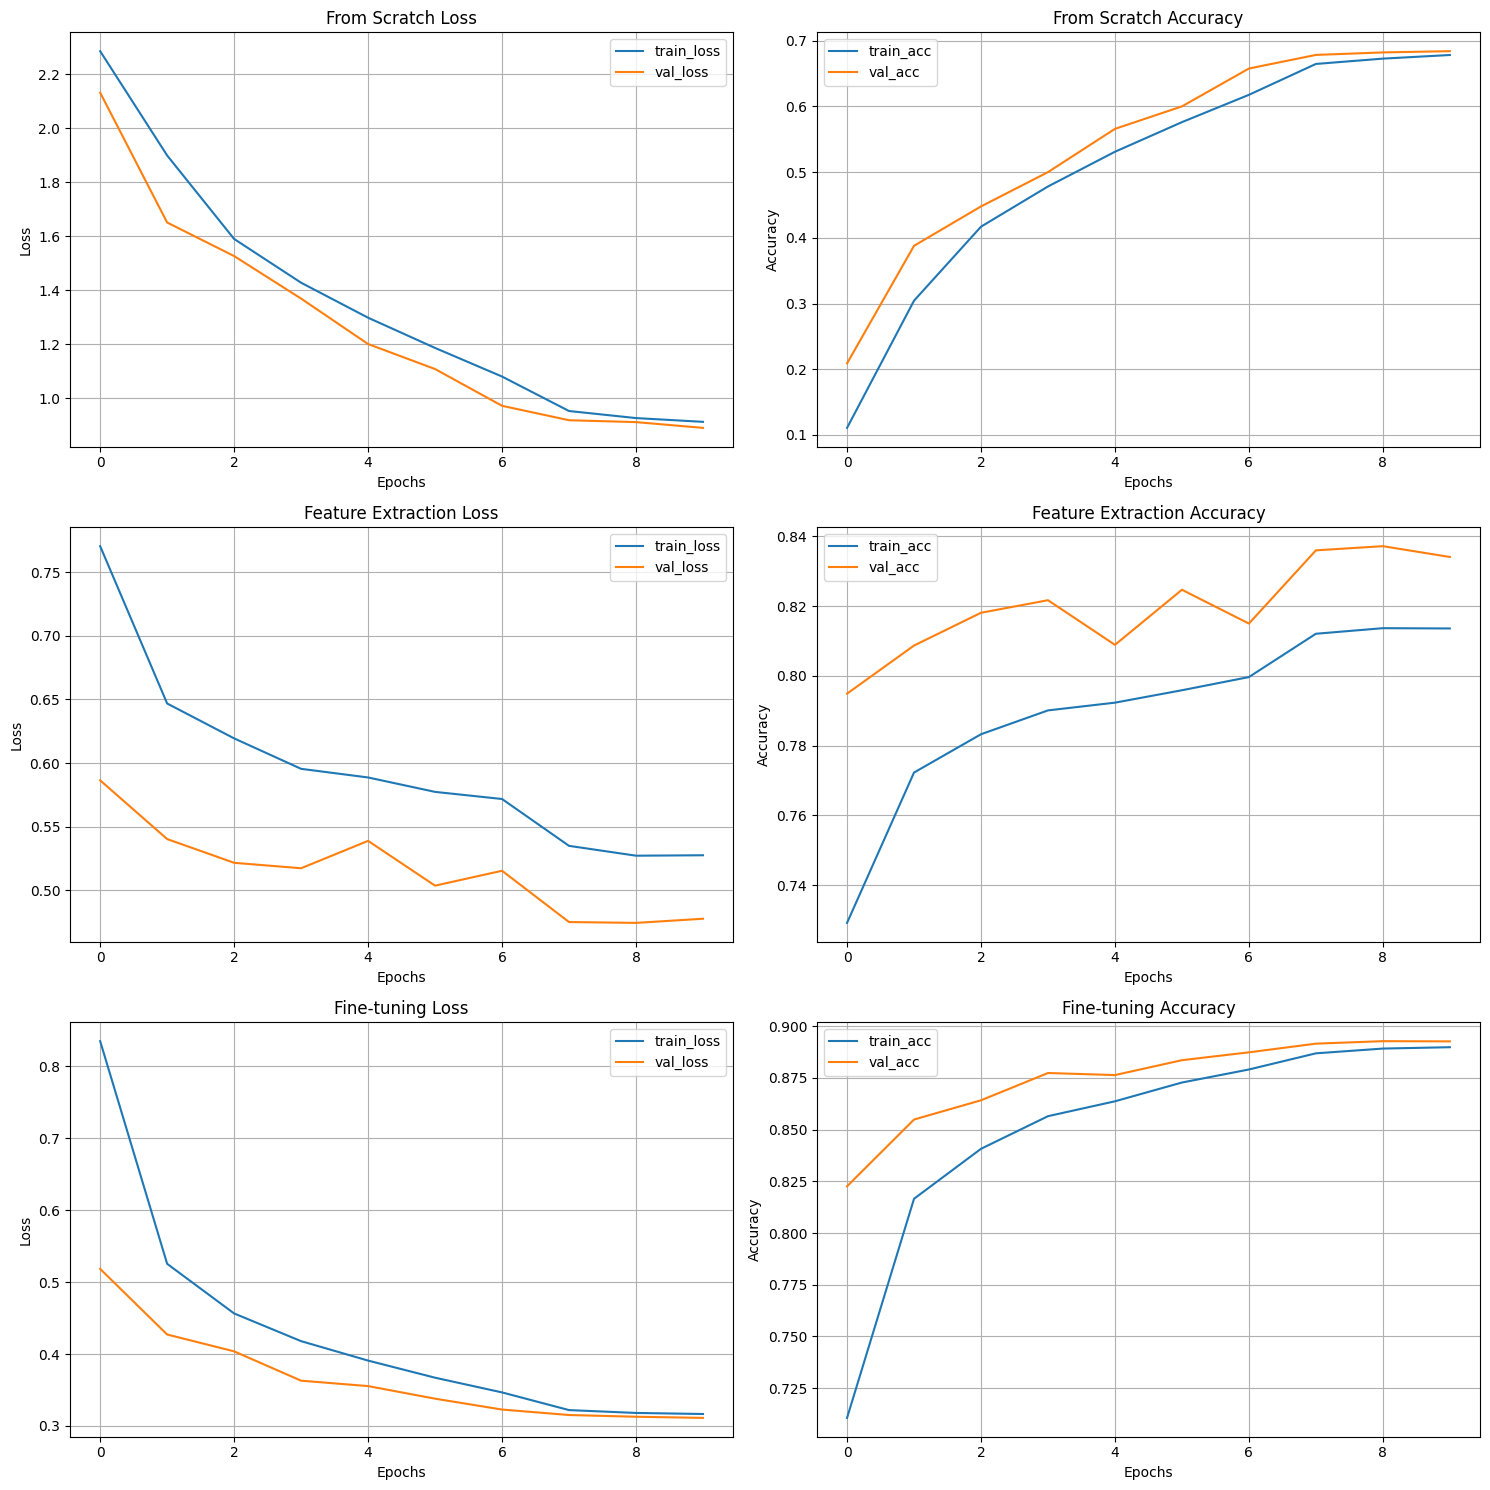

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.models import alexnet
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time
import copy
import os

# GPU 사용 가능 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- 1. 데이터셋 다운로드 및 전처리 ---
print("\n--- 1. CIFAR-10 데이터셋 다운로드 및 전처리 ---")

# 데이터 전처리: 이미지 크기 조정, 데이터 증강, 텐서 변환, 정규화
transform_train = transforms.Compose([
    transforms.Resize(224), # AlexNet 입력 크기에 맞춤 (ImageNet 학습 시 사용된 크기)
    transforms.RandomHorizontalFlip(), # 데이터 증강: 이미지를 무작위로 수평 뒤집기
    transforms.ToTensor(), # 이미지를 PyTorch 텐서로 변환
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # CIFAR-10 평균 및 표준편차로 정규화
])

transform_val = transforms.Compose([
    transforms.Resize(224), # AlexNet 입력 크기에 맞춤
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# CIFAR-10 데이터셋 다운로드 및 로드
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

valset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_val)
valloader = DataLoader(valset, batch_size=64, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

print(f"학습 데이터셋 크기: {len(trainset)}")
print(f"검증 데이터셋 크기: {len(valset)}")

# --- 2. 모델 학습 및 평가 함수 정의 ---
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # 각 에포크는 학습(training) 단계와 검증(validation) 단계를 가집니다.
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # 모델을 학습 모드로 설정
            else:
                model.eval()   # 모델을 평가 모드로 설정

            running_loss = 0.0
            running_corrects = 0

            # 데이터 반복
            dataloader = trainloader if phase == 'train' else valloader
            dataset_size = len(trainloader.dataset) if phase == 'train' else len(valloader.dataset)

            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # 파라미터 경사(gradient)를 0으로 초기화
                optimizer.zero_grad()

                # 순전파
                # 학습 단계에서만 경사도 계산을 활성화
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # 학습 단계에서만 역전파 + 옵티마이즈
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # 통계
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train' and scheduler is not None:
                scheduler.step()

            epoch_loss = running_loss / dataset_size
            epoch_acc = running_corrects.double() / dataset_size

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # 에포크 기록
            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc.item())
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc.item())

            # 모델을 깊은 복사(deep copy)하여 저장
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    # 가장 좋은 모델 가중치 로드
    model.load_state_dict(best_model_wts)
    return model, history

# --- 3. 학습 결과 시각화 함수 ---
def plot_history(histories, titles):
    fig, axes = plt.subplots(len(histories), 2, figsize=(15, 5 * len(histories)))
    if len(histories) == 1: # 단일 모델인 경우 axes 차원 조정
        axes = axes.reshape(1, -1)

    for i, history in enumerate(histories):
        # Loss Plot
        axes[i, 0].plot(history['train_loss'], label='train_loss')
        axes[i, 0].plot(history['val_loss'], label='val_loss')
        axes[i, 0].set_title(f'{titles[i]} Loss')
        axes[i, 0].set_xlabel('Epochs')
        axes[i, 0].set_ylabel('Loss')
        axes[i, 0].legend()
        axes[i, 0].grid(True)

        # Accuracy Plot
        axes[i, 1].plot(history['train_acc'], label='train_acc')
        axes[i, 1].plot(history['val_acc'], label='val_acc')
        axes[i, 1].set_title(f'{titles[i]} Accuracy')
        axes[i, 1].set_xlabel('Epochs')
        axes[i, 1].set_ylabel('Accuracy')
        axes[i, 1].legend()
        axes[i, 1].grid(True)
    plt.tight_layout()
    plt.show()

# --- 4. 세 가지 전략 (From Scratch, Feature Extraction, Fine-tuning) 비교 ---
num_classes = len(classes)
num_epochs = 10 # 학습 에포크 수 설정 (실습을 위해 낮게 설정, 필요시 증가 가능)
criterion = nn.CrossEntropyLoss()
all_histories = []
all_titles = []

# --- 4.1. From Scratch 전략 ---
print("\n--- 4.1. From Scratch 전략 (AlexNet) ---")
# pretrained=False로 설정하여 가중치를 무작위 초기화
model_scratch = alexnet(pretrained=False)
# CIFAR-10 클래스 수에 맞게 마지막 분류 계층 수정
num_ftrs_scratch = model_scratch.classifier[6].in_features # 입력 feature의 크기
model_scratch.classifier[6] = nn.Linear(num_ftrs_scratch, num_classes)
model_scratch = model_scratch.to(device)

# 모든 파라미터를 학습 대상에 포함
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler_scratch = optim.lr_scheduler.StepLR(optimizer_scratch, step_size=7, gamma=0.1)

# 학습 대상 파라미터 개수 확인
total_params_scratch = sum(p.numel() for p in model_scratch.parameters() if p.requires_grad)
print(f"From Scratch 모델의 학습 대상 파라미터 개수: {total_params_scratch}")

trained_model_scratch, history_scratch = train_model(model_scratch, criterion, optimizer_scratch, exp_lr_scheduler_scratch, num_epochs=num_epochs)
all_histories.append(history_scratch)
all_titles.append('From Scratch')


# --- 4.2. Feature Extraction 전략 ---
print("\n--- 4.2. Feature Extraction 전략 (Pre-trained AlexNet) ---")
# pretrained=True로 설정하여 ImageNet으로 사전 학습된 가중치 로드
model_feature_extract = alexnet(pretrained=True)

# 모든 파라미터를 고정(freeze)
for param in model_feature_extract.parameters():
    param.requires_grad = False

# 마지막 분류 계층만 새로 생성하여 학습 가능하게 설정
num_ftrs_fe = model_feature_extract.classifier[6].in_features
model_feature_extract.classifier[6] = nn.Linear(num_ftrs_fe, num_classes)
model_feature_extract = model_feature_extract.to(device)

# 새로 생성된 파라미터만 학습 대상에 포함
optimizer_feature_extract = optim.SGD(model_feature_extract.classifier.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler_fe = optim.lr_scheduler.StepLR(optimizer_feature_extract, step_size=7, gamma=0.1)

# 학습 대상 파라미터 개수 확인
total_params_fe = sum(p.numel() for p in model_feature_extract.parameters() if p.requires_grad)
print(f"Feature Extraction 모델의 학습 대상 파라미터 개수: {total_params_fe}")

trained_model_fe, history_fe = train_model(model_feature_extract, criterion, optimizer_feature_extract, exp_lr_scheduler_fe, num_epochs=num_epochs)
all_histories.append(history_fe)
all_titles.append('Feature Extraction')


# --- 4.3. Fine-tuning 전략 ---
print("\n--- 4.3. Fine-tuning 전략 (Pre-trained AlexNet) ---")
# pretrained=True로 설정하여 ImageNet으로 사전 학습된 가중치 로드
model_finetune = alexnet(pretrained=True)
# CIFAR-10 클래스 수에 맞게 마지막 분류 계층 수정 (이 계층은 자동으로 학습 가능)
num_ftrs_ft = model_finetune.classifier[6].in_features
model_finetune.classifier[6] = nn.Linear(num_ftrs_ft, num_classes)
model_finetune = model_finetune.to(device)

# 모든 파라미터를 학습 대상에 포함 (Fine-tuning이므로)
optimizer_finetune = optim.SGD(model_finetune.parameters(), lr=0.0001, momentum=0.9) # 학습률을 더 작게 설정
exp_lr_scheduler_ft = optim.lr_scheduler.StepLR(optimizer_finetune, step_size=7, gamma=0.1)

# 학습 대상 파라미터 개수 확인
total_params_ft = sum(p.numel() for p in model_finetune.parameters() if p.requires_grad)
print(f"Fine-tuning 모델의 학습 대상 파라미터 개수: {total_params_ft}")

trained_model_ft, history_ft = train_model(model_finetune, criterion, optimizer_finetune, exp_lr_scheduler_ft, num_epochs=num_epochs)
all_histories.append(history_ft)
all_titles.append('Fine-tuning')

# --- 5. 학습 결과 시각화 및 분석 ---
print("\n--- 5. 학습 결과 시각화 ---")
plot_history(all_histories, all_titles)
